In [6]:
import matplotlib.pyplot as plt
from pylab import arange
from math import e
from math import pi
from numpy import poly1d
from time import process_time_ns
import pylab

def zeroV(m):
    z = [0]*m
    return(z)

#На вход: кол-во узлов, кординаты по x, координаты по y
def cubic_spline(n, xn, a):
    """Функция cubic_spline интерполирует между узлами
        задается списками xn и a. Функция вычисляет коэффициенты
        и выводит диапазоны кусочно-кубических сплайнов."""        

    h = zeroV(n-1); alpha = zeroV(n-1)
    l = zeroV(n+1); u = zeroV(n);   z = zeroV(n+1)
    b = zeroV(n);   c = zeroV(n+1); d = zeroV(n)    

    for i in range(n-1):
        h[i] = xn[i+1]-xn[i]  

    for i in range(1, n-1):
        alpha[i] = (3./h[i])*(a[i+1]-a[i])-(3./h[i-1])*(a[i] - a[i-1])

    # I   
    l[0] = 1; u[0] = 0; z[0] = 0

    # II
    for i in range(1, n-1):
        l[i] = 2*(xn[i+1] - xn[i-1]) - h[i-1]*u[i-1]
        u[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1; z[n] = 0; c[n] = 0

    # III
    for j in range(n-2, -1, -1):      
        c[j] = z[j] - u[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3.
        d[j] = (c[j+1] - c[j])/(3*h[j]) 

    for j in range(n-1):
        cub_graph(a[j],b[j],c[j],d[j],xn[j],xn[j+1])
    plt.show()

def cub_graph(a,b,c,d, x_i, x_i_1):
    """cub_graph принимает i-й набор коэффициентов вместе с x[i] и x[i+1] - й
    pts данных и строит полиномиальный сплайн между двумя pts данных, используя
    объект python poly1d """
    root = poly1d(x_i,True)
    poly = 0
    poly = d*(root)**3
    poly = poly + c*(root)**2
    poly = poly + b*root
    poly = poly + a

    pts = arange(x_i,x_i_1, 0.001)
    plt.plot(pts, poly(pts), '-')
    return

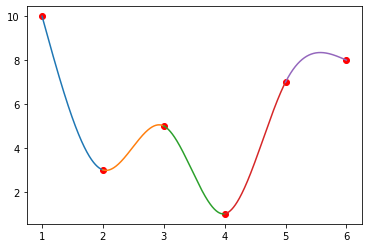

In [7]:
x_vals = [1,2,3,4,5,6]
fx = [10,3,5,1,7,8]
#Строим сплайн
pylab.plot([1,2,3,4,5,6],[10,3,5,1,7,8],'ro')
# Run cubic_spline interpolant.
cubic_spline(6,x_vals,fx)

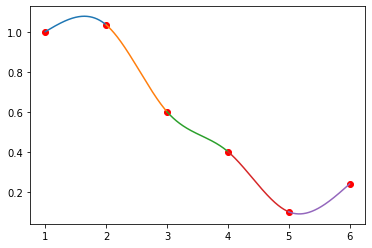

In [8]:
x_vals = [1,2,3,4,5,6]
fx = [1.0002, 1.0341, 0.6, 0.40105, 0.1, 0.23975]
#Строим сплайн
pylab.plot([1,2,3,4,5,6],[1.0002, 1.0341, 0.6, 0.40105, 0.1, 0.23975],'ro')
# Run cubic_spline interpolant.
cubic_spline(6,x_vals,fx)